Accuracy: 75.00%
Confusion Matrix:
[[3 0]
 [1 0]]


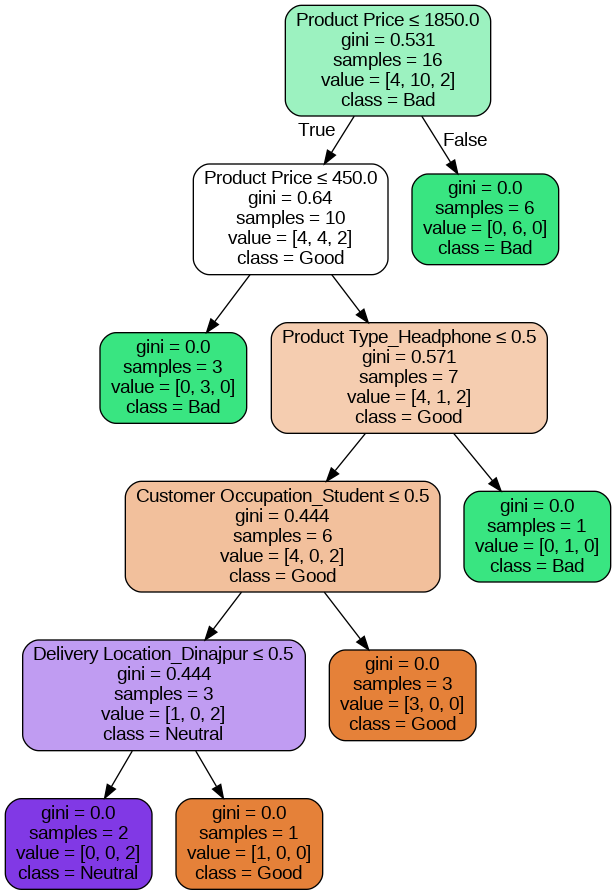

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import OneHotEncoder
import graphviz
from IPython.display import Image

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def gini_impurity(self, labels):
        unique_classes, counts = np.unique(labels, return_counts=True)
        probabilities = counts / len(labels)
        gini = 1 - np.sum(probabilities ** 2)
        return gini

    def split_data(self, data, feature, value):
        mask = data[feature] <= value
        return data[mask], data[~mask]

    def find_best_split(self, data, labels):
        num_features = data.shape[1]
        best_gini = float('inf')
        best_feature = None
        best_value = None

        for feature in data.columns:
            unique_values = data[feature].unique()
            for value in unique_values:
                left_data, right_data = self.split_data(data, feature, value)
                left_labels = labels[left_data.index]
                right_labels = labels[right_data.index]

                gini_left = self.gini_impurity(left_labels)
                gini_right = self.gini_impurity(right_labels)

                gini = (len(left_labels) / len(labels)) * gini_left + (len(right_labels) / len(labels)) * gini_right

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_value = value

        return best_feature, best_value

    def create_node(self, data, labels, depth):
        unique_classes = np.unique(labels)

        # If only one class in the data or max depth reached, create a leaf node
        if len(unique_classes) == 1 or (self.max_depth is not None and depth == self.max_depth):
            return {'class': unique_classes[0]}

        # If no feature left to split or gini impurity is 0, create a leaf node with majority class
        if data.shape[1] == 0 or self.gini_impurity(labels) == 0:
            majority_class = np.bincount(labels).argmax()
            return {'class': majority_class}

        # Find the best feature and value to split the data
        best_feature, best_value = self.find_best_split(data, labels)

        if best_feature is None or best_value is None:
            majority_class = np.bincount(labels).argmax()
            return {'class': majority_class}

        # Recursively create left and right branches
        left_data, right_data = self.split_data(data, best_feature, best_value)
        left_labels = labels[left_data.index]
        right_labels = labels[right_data.index]

        left_node = self.create_node(left_data, left_labels, depth + 1)
        right_node = self.create_node(right_data, right_labels, depth + 1)

        return {'feature': best_feature, 'value': best_value, 'left': left_node, 'right': right_node}

    def fit(self, data, labels):
        self.tree = self.create_node(data, labels, depth=0)

    def display_decisionTree(self, node=None, indent=""):
        if node is None:
            node = self.tree

        if 'class' in node:
            print(indent + "Class:", node['class'])
        else:
            print(indent + "Feature:", node['feature'])
            print(indent + "Value:", node['value'])
            print(indent + "Left:")
            self.display_decisionTree(node['left'], indent + "  ")
            print(indent + "Right:")
            self.display_decisionTree(node['right'], indent + "  ")
    def display_decisionTree_with_graphviz(self, feature_names=None, class_names=None):
        # Create a scikit-learn DecisionTreeClassifier for visualization
        clf = DecisionTreeClassifier(max_depth=self.max_depth)
        clf.fit(self.X_train, self.y_train)

        dot_data = export_graphviz(clf, out_file=None,
                                   feature_names=feature_names,
                                   class_names=class_names,
                                   filled=True, rounded=True, special_characters=True)

        graph = graphviz.Source(dot_data)

        graph.render("DecisionTreeVisualization", format='png')  # Save as PNG

        return graph

    def train_test_split(self, X, y, test_size=0.2, random_state=None):
        return train_test_split(X, y, test_size=test_size, random_state=random_state)

    def predict(self, instance, node=None):
        if node is None:
            node = self.tree

        if 'class' in node:
            return node['class']
        else:
            if instance[node['feature']] <= node['value']:
                return self.predict(instance, node['left'])
            else:
                return self.predict(instance, node['right'])

    def evaluate(self, X_test, y_test):
        predictions = [self.predict(instance) for _, instance in X_test.iterrows()]
        accuracy = accuracy_score(y_test, predictions)
        confusion_mat = confusion_matrix(y_test, predictions)
        return accuracy, confusion_mat

# Example usage
data = pd.read_csv('/content/sample_data/dataset.csv')
data_encoded = pd.get_dummies(data, columns=['Customer Occupation', 'Product Type', 'Delivery Location', 'Transaction Type', 'Gender'])

X = data_encoded.drop(['Customer ID', 'Product Reviews'], axis=1)
y = data['Product Reviews']

tree_model = DecisionTree(max_depth=5)
X_train, X_test, y_train, y_test = tree_model.train_test_split(X, y, test_size=0.2, random_state=42)

tree_model.fit(X_train, y_train)
tree_model.X_train = X_train
tree_model.y_train = y_train

feature_names = X.columns.tolist()
class_names = y.unique().astype(str).tolist()

# Display decision tree using Graphviz
tree_model.display_decisionTree_with_graphviz(feature_names=feature_names, class_names=class_names)

#tree_model.display_decisionTree()
accuracy, confusion_matrix = tree_model.evaluate(X_test, y_test)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix)
# Display the saved image in Colab
Image("DecisionTreeVisualization.png")


In [ ]:
pip install graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 13)